# Apresentação, introdução, iniciação ao problema...

---

Esse é um famoso banco de dados que provém de uma competição do [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Ele está disponível neste [link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) e tem a seguinte descrição

**Comece aqui se**:

1. Você tem experiência com R ou Python; e
2. Conhece um pouco sobre aprendizado de máquina;

Ideal para uma pessoa que está aprendendo análise de dados em Python (em R eu já estou em um nível relativamente intermediário) e também aprendizado de máquina (igual eu, neste momento). 

## Descrição da competição 

---

Esse é um banco de dados *playground*, justamente para aplicarmos tudo aquilo que aprendemos em análise de dados e previsão. Também menciona a parte que muitas coisas, como o número de banheiros, influencia no valor de uma casa.

O banco de dados possui 79 variáveis explicativas, estas referem aos aspectos residenciais de casas da cidade de Ames em Iowa.

## Objetivo

---

A partir destas 79 variáveis explicativas, isto é, as características das casas, prever o valor de casa. 

## Habilidades que serão praticadas (segundo o Kaggle)

---

1. Criatividade na criação da *feature engineering* (recomendo pesquisar no Google caso não saiba o que é isso); e
2. Para a parte de previsão (aprendizado de máquina): utilização de regressão, random forest, gradient boosting, etc.

## Métrica para verificação dos resultados

---

Será utilizado o Root-Mean-Squared-Error (RMSE), para os mais intimos, a raiz do erro quadrático médio, entre o *log* do valor que o nosso modelo preveu, ou estimou, ($ \hat{y_i} $) e o real valor da casa ($ y $). A fórmula para o RMSE é dada por

$$ RMSE = \sqrt{\frac{1}{n}\sum_{i = 1}^{n} (\hat{y_i} - y_i)^2} $$ 

# Bibliotecas utilizadas

---

- Pandas
- Numpy
- Matplotlib
- Seaborn
- Sklearn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-muted")
%matplotlib inline

# Carregando os dados com o Pandas

---

In [2]:
treino = pd.read_csv(filepath_or_buffer = "train.csv")
teste = pd.read_csv(filepath_or_buffer = "test.csv")

# Explorando os dados

---

## Verificando a estrutura dos dados

Quando baixamos os dados do *Kaggle*, eles vem em um arquivo ZIP com os dados de **treino, teste, a amostra para submissão e um dicionário de cada variável**, mostrando o que significa cada uma e seus respectivos valores. Então, qualquer manuseio, exploração, modificação, etc, será feito nos dados de teste.

Podemos inicialmente verificar como os dados estão organizados, um simples *overview* com o método `.head`.

In [3]:
treino.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


A partir do método `.head`, verificamos que, aparentemente, os dados estão em um formato ok, entretanto, não conseguimos ver os valores de todas as colunas (variáveis). Logo, podemos utilizar o método `.info` para verificar o formato de cada uma e seus valores. 

In [4]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
print("Dimensão dos dados de treino")

treino.shape

Dimensão dos dados de treino


(1460, 81)

In [6]:
print("Dimensão dos dados de teste")

teste.shape

Dimensão dos dados de teste


(1459, 80)

---

Com essa visualização, podemos confirmar o que foi dito na introdução, que realmente são 79 variáveis explicativas e a última variável (**SalePrice**) é a variável que queremos prever a partir destas. Assim como podemos observar que são muuuuuuuitas variáveis, estas nos trazem informações desde o tipo de moradia, se a residência possui ar condicionado até a condição em que está a garagem da residência.

---

## Explorando a variável SalePrice


Podemos ter `n` ideias aqui, mas, inicialmente, podemos ver como é a distribuição da variável que queremos prever, o Preço de Venda, através de um histograma.

Percebemos que a distribuição do Preço de Vendas possui concentração negativa ou cauda à direita, indicando que os valores predominantes são baixos (para a variável), uma distribuição F de Snedecor caíria bem, talvez. 

**Também podemos notar que:**

- A maior quantidade preços vendidos, isto é, o valor mais frequente do preço de casas está entre \\$ 100.000,00 e  \\$ 150.000,00;

- Também podemos ver casos em que o preço de venda foi \\$ 600.000,00 ou \\$ 700.000,000, entretanto, eles não são tão frequentes, quando comparados com os valores da variável (seriam eles outliers?);

**Nota**: Também é utilizado a densidade da variável, ela é estimada a partir dos dados e o método mais comum para essa estimação é o KDE (Kernel Density Estimation). Um *Kernel* comumente utilizado é o gaussiano.  

---

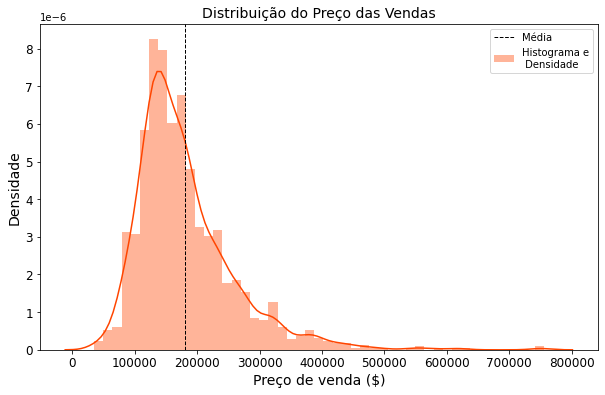

In [7]:
media_sales_price = treino["SalePrice"].mean()
var_sales_price = treino["SalePrice"].var()

plt.figure(figsize = [10, 6])
sns.distplot(treino["SalePrice"], color = "orangered", hist = True, label = "Histograma e\n Densidade")
plt.axvline(media_sales_price, color = 'k', linestyle = 'dashed', linewidth = 1, label = "Média")
plt.xlabel("Preço de venda ($)", fontsize = 14, color = "black")
plt.ylabel("Densidade", fontsize = 14, color = "black")
plt.title("Distribuição do Preço das Vendas", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.legend()
plt.show()

---

**Abaixo podemos ver o sumário estatístico da variável Preço de Vendas, podemos afirmar que:**

- Realmente temos 1.460 observações nesta variável;

- O preço médio de venda das casas, assim como já plotada no histograma, é de, aproximadamente, \\$ 180.921,00;

- O desvio padrão do preço de venda das casas é alto, \\$ 79.442,00, indicando que temos alta variabilidade;

- O preço mediano de venda de casas, valor que separa os dados em 50% acima e abaixo da variável, foi de \\$ 163.000,00, indicando que metade dos valores está acima deste valor e a outra metade abaixo;

- O valor máximo de venda de casas foi de \\$ 755.000,00.


---

In [8]:
treino["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

---

## Explorando outras variáveis

### Verificando os valores nulos

Os valores nulos são dados ausentes que, por algum motivo (seja ele erro da pesquisa, erro de digitação, etc), ele não se encontra no banco de dados. Podemos verificar as variáveis que possuem nulos com o seguinte comando.

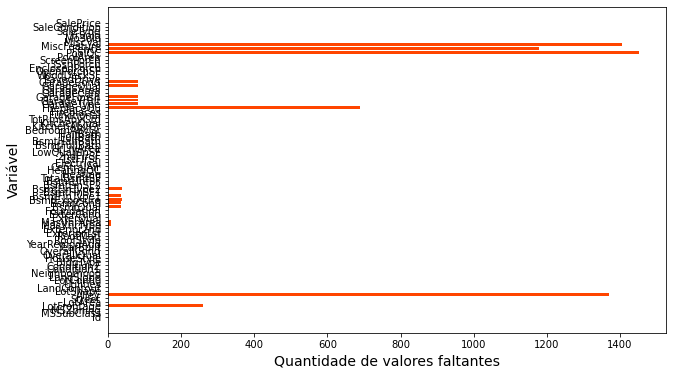

In [9]:
miss_val_treino = treino.isnull().sum()

dados_miss_val_treino = pd.DataFrame(miss_val_treino)

dados_miss_val_treino = dados_miss_val_treino.reset_index()

dados_miss_val_treino.columns = ["Variável", "Quantidade"]

plt.figure(figsize = [10, 6])
plt.barh(dados_miss_val_treino["Variável"], dados_miss_val_treino["Quantidade"], align = "center", color = "orangered")
plt.xlabel("Quantidade de valores faltantes", fontsize = 14, color = "black")
plt.ylabel("Variável", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelcolor = "black")
plt.tick_params(axis = "y", labelcolor = "black")
plt.show()

---

É, podemos perceber que tiveram algumas variáveis que possuíram valores absurdos de valores faltantes mas, pelo gráfico, não conseguimos saber quais exatamente. Portanto vamos fazer um simples filtro para aquelas que foram maiores que 0 e, também, organizar em ordem decrescente o gráfico. .

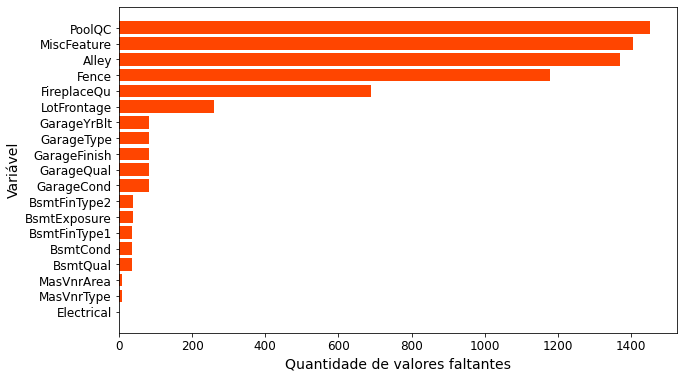

In [10]:
dados_miss_val_treino0 = dados_miss_val_treino[dados_miss_val_treino["Quantidade"] > 0].sort_values(by = "Quantidade")

plt.figure(figsize = [10, 6])
plt.barh(dados_miss_val_treino0["Variável"], dados_miss_val_treino0["Quantidade"], align = "center", color = "orangered")
plt.xlabel("Quantidade de valores faltantes", fontsize = 14, color = "black")
plt.ylabel("Variável", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.show()

---

Apenas para relembrar, nosso banco de dados `treino` possui 1460 informações de casas, isto é, linhas. Notando as top4 variáveis com mais valores faltantes temos:

1. PoolQC: Qualidade da Piscina - se não tem qualidade, é por que não tem piscina. Logo, podemos concluir que muitas das casas que estão disponíveis no banco de dados não possuem piscina.
2. MiscFeature: Recursos, como Elevator, 2nd Garage, Galpão, e Quadra de Tênis). Assim como a maioria destas casas também não possui estes recursos citados anteriormente.
3. Alley: Seria algo como caminho (beco) entre duas residências. Até temos informações, 91 valores.
4. Fence: Aqui seria algo como o quão seguro você se sente com o cercado da residência (boa, mínima privacidade). 


**Conclusão:** Pudemos verificar que a maioria dos valores faltantes estão relacionados variáveis que indicam os recursos a mais que a residência não possui, seja ela piscina, galpão, quadra de tênis, etc, que a casa não têm. Entretanto, algumas das variáveis acima também possuem métricas (área, por exemplo) que podem não ser medidas e simplesmente não termos essa informação devido a isso.

Abaixo podemos verificar a quantidade de valores por categoria de cada variável.

---

In [11]:
treino["PoolQC"].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [12]:
treino["MiscFeature"].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [13]:
treino["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [14]:
treino["Fence"].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

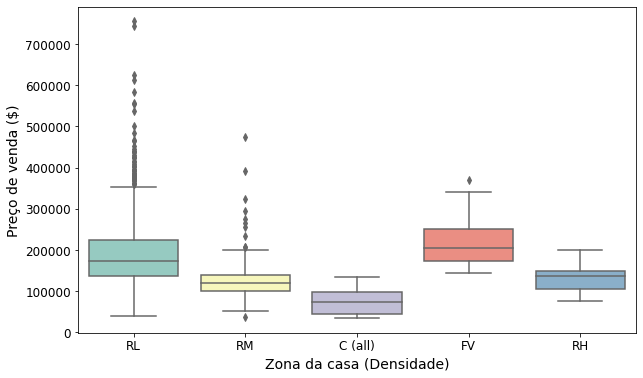

In [15]:
plt.figure(figsize = [10, 6])

#---

sns.boxplot(x = "MSZoning", y = "SalePrice", data = treino, palette = "Set3")
plt.xlabel("Zona da casa (Densidade)", fontsize = 14, color = "black")
plt.ylabel("Preço de venda ($)", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")


#---

plt.show()

---

Através do boxplot acima podemos concluir que:
    
- Zona RL (zona residencial com densidade demográfica baixa) diz respeito exclusivamente ou predominantemente a zona de residências que precisa se deslocar para ir a um mercado, por exemplo. Esta é a que mais possui outliers no preço de venda. A mediana do preço nesta zona foi próxima de \\$ 200.000,00 enquanto que teve valores que chegaram a \\$ 700.000,00. Também apresentaram alta variação, quando comparado com as demais zonas. 

- Zona RM (zona residencial com média densidade) diz respeito a localização de atividades típicas de centros de bairros. Assim como na zona RL, também possui outliers, entretanto nos mostra uma baixa variação nos preços de venda. Também é notável que o preço mediano de venda é menor quando comparado com a zona RL.

- Zona C (zona comercial). Possui o menor preço de vendas, quando comparado com as demais. A mediana não chega a \\$ 100.000,00. Baixa variabilidade. Tudo isso indica que os valores de residências comerciais são bastante controladas e, provavelmente, possuem um padrão. 

- Zona FV (vila flutuante, para quem já viu as casas dos ribeirinhos na Amazônia, seria algo como isso) é a que possui preço mediano de vendas mais caro. Possui alta variabilidade, com uma residência indicando ser outlier. 

- Zona RH (zona residencial com densidade demográfica alta) diz respeito tipicamente a área de centro urbano. Assim como a zona comercial possui variabilidade controlada (mostrando um padrão no preco de vendas). Mediana próxima a \\$ 150.000,00. 

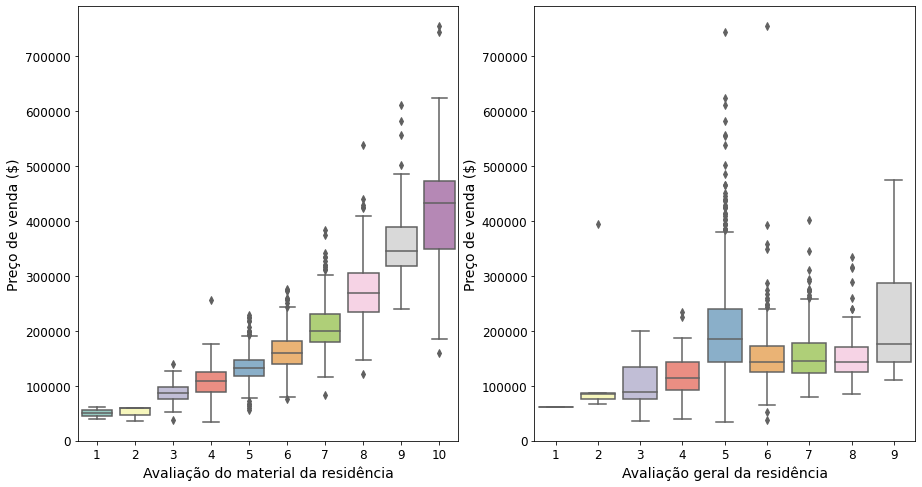

In [16]:
plt.figure(figsize = [15, 8])

plt.subplot(1, 2, 1)

sns.boxplot(x = "OverallQual", y = "SalePrice", data = treino, palette = "Set3")
plt.xlabel("Avaliação do material da residência", fontsize = 14, color = "black")
plt.ylabel("Preço de venda ($)", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")

#---

plt.subplot(1, 2, 2)


sns.boxplot(x = "OverallCond", y = "SalePrice", data = treino, palette = "Set3")
plt.xlabel("Avaliação geral da residência", fontsize = 14, color = "black")
plt.ylabel("Preço de venda ($)", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")

#---

plt.show()

---

As avaliações seguem uma escala de 1 (muito pobre) a 10 (muito excelente). **Podemos verificar através dos boxplots acima que:**
 
1. Avaliação do material x Preço ($): 

    - Conforme a avaliação do material da residência cresce o preço de venda também, isto é, esta avaliação é diretamente proporcional ao preço de venda.

2. Avaliação geral da residência x Preço (\\$): 

    - Poucas pessoas classificaram as residências nas categorias 1 e 2 (muito pobre e pobre, respectivamente), logo, temos poucas informações (somente uma residência) sobre estas;
    
    - Uma casa que foi classificada de avaliação pobre teve um valor próximo a \\$ 400.000,00 (estranho não ?);
    
    - As categorias 6 e 5 (acima da média e média, respectivamente) são as que possuem valores de venda mais caros. Inclusive, muitas 
    classificaram as casas como categoria média para a residência e a quantidade de residência foi absurdamente alto devido aos *outliers*;
    
    - As residências das categorias 6, 7 e 8 possuem valor mediano e de variação de venda próximos;
    
    - As residências da categoria 9 (excelente) possuem valor mediano próximo ao da categoria 5, confirmando o que foi dito acima. Também possui grande variação. 
    

As demais variáveis qualitativas no geral possuem informação sobre a qualidade de determinados serviços que a residência possui ou não (ar-condicionado, lareira, garagem, etc). Portanto, podemos passar para as variáveis quantitativas.
 

### Correlação Linear de Pearson (Variáveis Quantitativas)

Uma forma de verificar a relação entre as variáveis X e Y, caso elas sejam quantitativas, é por meio do coeficiente de correlação de Pearson, pois ele mede o grau da correlação linear entre duas variáveis. 

Resumindo, a correlação linear de Pearson pode adotar valores que vão de de -1 a 1. Quanto mais próximo de -1 ou 1, maior é a relação linear entre ambas as variáveis (X e Y) e quanto mais próximo de 0 menor a relação a linear. O sinal (positivo ou negativo) indica uma correlação linear positiva ou negativa entre X e Y.   

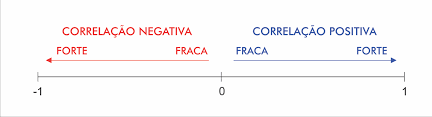


O que podemos fazer, já que temos mais de uma variável preditora, é fazer uma matriz ou um gráfico de correlação.


**Para mais informações sobre a correlação linear de Pearson, visite:** 

- http://www.inf.ufsc.br/~vera.carmo/Correlacao/Correlacao_Pearson_Spearman_Kendall.pdf
- https://operdata.com.br/blog/coeficientes-de-correlacao/
- http://www.leg.ufpr.br/~silvia/CE701/node79.html



Abaixo, podemos observar a matriz de correlação em formato de gráfico, pois, em vez de ver uma tabela imensa que nem cabe no Jupyter, o gráfico também é mais intuitivo dado a legenda e a as cores. 

Apesar de que a matriz de correlação, pelo *default* vai selecionar somente as variáveis numéricas, entretanto, algumas variáveis que foram categorizadas, isto é, transformadas de qualitativas para quantitativas, como a **MSSubClass**, aparecem. Logo, devemos retirar estas variáveis, já que não é através da Correlação de Pearson que verificamos uma relação linear entre variável qualitativa e quantitativa.

Assim como a **MSSubClass**, as variáveis retiradas foram: 

- Id;
- OverallQual; e
- OverallCond.

---

In [17]:
var_quant = treino._get_numeric_data()
var_quant = var_quant.drop(["Id", "MSSubClass", "OverallQual", "OverallCond"], axis = 1)

var_quant.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000


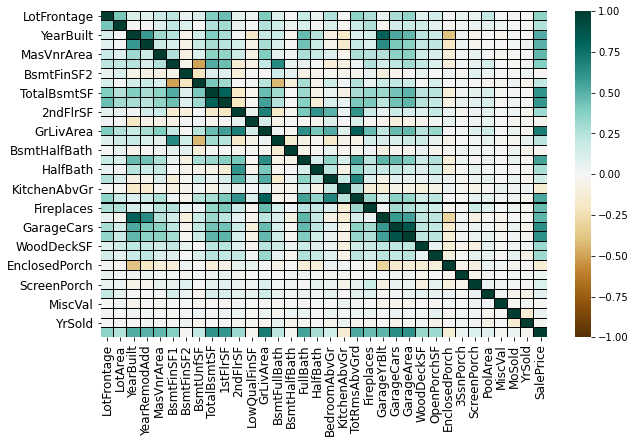

In [18]:
corr_var_quant = var_quant.corr()

plt.figure(figsize = [10, 6])
sns.heatmap(data = corr_var_quant, vmin = -1, vmax = 1, linewidths = 0.01, linecolor = "black", cmap = "BrBG")
plt.xlabel("", fontsize = 14, color = "black")
plt.ylabel("", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.show()

---

**Observando** o gráfico de correlação podemos notar que:

- A visualização está relativamente dificultada, pois no eixo Y não estão todas as variáveis;

- Muitas variáveis não possuem correlação linear ou possuem fraca correlação, como a **PoolArea, MiscVal, MoSold e YrSold**;

- São poucas as variáveis que possuem forte correlação linear com a SalePrice (a partir de agora é melhor falar o exato nome da variável)

---

In [19]:
corr_var_quant["SalePrice"].round(2)

LotFrontage      0.35
LotArea          0.26
YearBuilt        0.52
YearRemodAdd     0.51
MasVnrArea       0.48
BsmtFinSF1       0.39
BsmtFinSF2      -0.01
BsmtUnfSF        0.21
TotalBsmtSF      0.61
1stFlrSF         0.61
2ndFlrSF         0.32
LowQualFinSF    -0.03
GrLivArea        0.71
BsmtFullBath     0.23
BsmtHalfBath    -0.02
FullBath         0.56
HalfBath         0.28
BedroomAbvGr     0.17
KitchenAbvGr    -0.14
TotRmsAbvGrd     0.53
Fireplaces       0.47
GarageYrBlt      0.49
GarageCars       0.64
GarageArea       0.62
WoodDeckSF       0.32
OpenPorchSF      0.32
EnclosedPorch   -0.13
3SsnPorch        0.04
ScreenPorch      0.11
PoolArea         0.09
MiscVal         -0.02
MoSold           0.05
YrSold          -0.03
SalePrice        1.00
Name: SalePrice, dtype: float64

---

**Observando** valores maiores que 0.5 ou menor que -0.5, temos as variáveis mais correlacionadas linearmente com a SalePrice:
       
- YearBuilt;
- YearRemodAdd;
- TotalBsmtSF;
- 1stFlrSF;
- GrLivArea;
- FullBath; 
- TotRmsAbvGrd;
- GarageCars;
- GarageArea.
     
Podemos agora verificar a correlação especificamente entre as nossas variáveis do novo conjunto de dados.

---

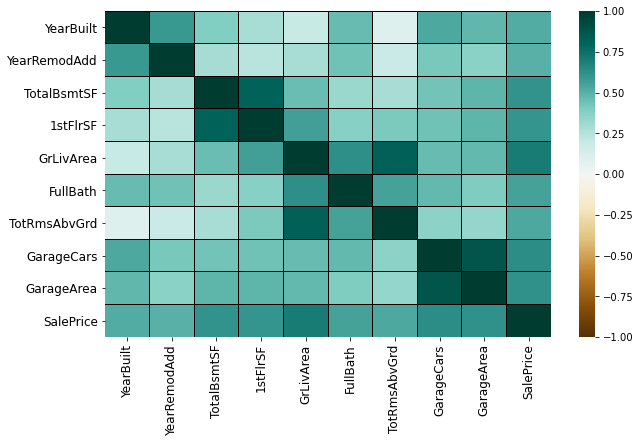

In [20]:
novo_banco = treino[["YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea", "SalePrice"]]
corr_novo_banco = novo_banco.corr()

plt.figure(figsize = [10, 6])
sns.heatmap(data = corr_novo_banco, vmin = -1, vmax = 1, linewidths = 0.01, linecolor = "black", cmap = "BrBG")
plt.xlabel("", fontsize = 14, color = "black")
plt.ylabel("", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.show()

---

Podemos observar que a **GarageCars** e **GarageArea** apresentaram forte correlação, assim como podemos confirmar abaixo.

---

In [21]:
corr_novo_banco["GarageCars"].round(2)

YearBuilt       0.54
YearRemodAdd    0.42
TotalBsmtSF     0.43
1stFlrSF        0.44
GrLivArea       0.47
FullBath        0.47
TotRmsAbvGrd    0.36
GarageCars      1.00
GarageArea      0.88
SalePrice       0.64
Name: GarageCars, dtype: float64

---

Segundo a descrição do banco de dados, o que é cada variável:

- GarageCars: Tamanho da garagem em capacidade de carros

- GarageArea: Tamanho da garagem em pés quadrados (unidade de área dos Estados Unidos)

Como elas possuem forte correlação entre si, o ideal é que seja escolhida somente uma, neste caso, iremos escolher a GarageArea, pois apresentar mais logicamente uma medida de área. Assim, podemos excluir a variável GarageCars do banco de dados atual `novo_banco`.

---

In [22]:
novo_banco = novo_banco.drop(["GarageCars"], axis = 1)

novo_banco.head()

,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,SalePrice
0,2003,2003,856,856,1710,2,8,548,208500
1,1976,1976,1262,1262,1262,2,6,460,181500
2,2001,2002,920,920,1786,2,6,608,223500
3,1915,1970,756,961,1717,1,7,642,140000
4,2000,2000,1145,1145,2198,2,9,836,250000


---

Podemos também, verificar a relação linear individual entre as variáveis preditoras e a variável `SalePrice` (Y, dependente, target, etc), através de um `scatterplot`.

---

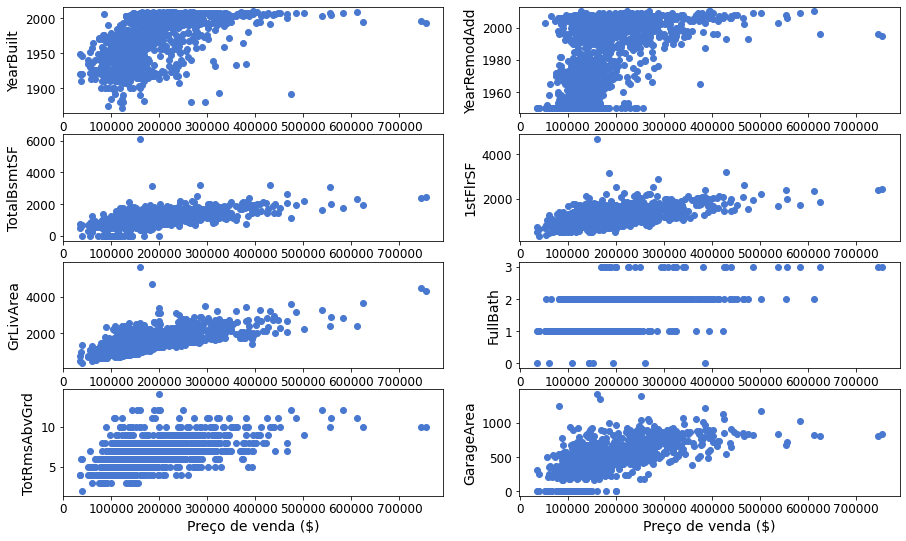

In [23]:
plt.figure(figsize = [15, 9])

plt.subplot(4, 2, 1)

plt.scatter(treino["SalePrice"], treino["YearBuilt"])
plt.xlabel("Preço de venda ($)", fontsize = 14, color = "black")
plt.ylabel("YearBuilt", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")

plt.subplot(4, 2, 2)


plt.scatter(treino["SalePrice"], treino["YearRemodAdd"])
plt.xlabel("Preço de venda ($)", fontsize = 14, color = "black")
plt.ylabel("YearRemodAdd", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")


plt.subplot(4, 2, 3)


plt.scatter(treino["SalePrice"], treino["TotalBsmtSF"])
plt.xlabel("Preço de venda ($)", fontsize = 14, color = "black")
plt.ylabel("TotalBsmtSF", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")


plt.subplot(4, 2, 4)

plt.scatter(treino["SalePrice"], treino["1stFlrSF"])
plt.xlabel("Preço de venda ($)", fontsize = 14, color = "black")
plt.ylabel("1stFlrSF", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")


plt.subplot(4, 2, 5)

plt.scatter(treino["SalePrice"], treino["GrLivArea"])
plt.xlabel("Preço de venda ($)", fontsize = 14, color = "black")
plt.ylabel("GrLivArea", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")


plt.subplot(4, 2, 6)

plt.scatter(treino["SalePrice"], treino["FullBath"])
plt.xlabel("Preço de venda ($)", fontsize = 14, color = "black")
plt.ylabel("FullBath", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")


plt.subplot(4, 2, 7)

plt.scatter(treino["SalePrice"], treino["TotRmsAbvGrd"])
plt.xlabel("Preço de venda ($)", fontsize = 14, color = "black")
plt.ylabel("TotRmsAbvGrd", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")


plt.subplot(4, 2, 8)

plt.scatter(treino["SalePrice"], treino["GarageArea"])
plt.xlabel("Preço de venda ($)", fontsize = 14, color = "black")
plt.ylabel("GarageArea", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")


plt.show()

---

Podemos notar que as variáveis **GrLivArea, 1stFlrSF e TotalBsmtSF** possuem uma relação linear aparente com o **Preço de Venda**, confirmando com o que foi dito e concluído através da Correlação Linear de Pearson. 

# Transformação dos dados

---

## `Log` na variável Preço de Venda

**Lembrando que todas as transformações feitas nos dados de treino também devem ser feitas nos dados de teste.**

Agora que vimos os padrões, relações e distribuições das variáveis do nosso banco. Podemos ir para a parte das transformações dos dados. 


1. A primeira é utilizar o `log` do preço de venda, fazemos isso a partir do comando:

`treino["SalePrice"] = np.log(treino["SalePrice"])`


**Essa transformação apenas será feita nos dados de treino, pois nos dados de teste não temos esta variável (já que queremos prever ela a partir das características da residência).**

---

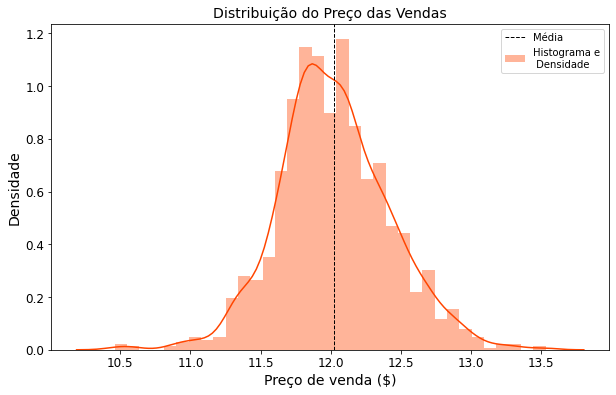

In [24]:
treino["SalePrice"] = np.log(treino["SalePrice"])

media_sales_price = treino["SalePrice"].mean()
var_sales_price = treino["SalePrice"].var()

plt.figure(figsize = [10, 6])
sns.distplot(treino["SalePrice"], color = "orangered", hist = True, label = "Histograma e\n Densidade")
plt.axvline(media_sales_price, color = 'k', linestyle = 'dashed', linewidth = 1, label = "Média")
plt.xlabel("Preço de venda ($)", fontsize = 14, color = "black")
plt.ylabel("Densidade", fontsize = 14, color = "black")
plt.title("Distribuição do Preço das Vendas", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.legend()
plt.show()

---

E a cara da distribuição da variável preço de venda fica com essa cara de uma distribuição normal, que interessante.



## Concatenando os dados de treino e teste

Gostaria de agradecer ao Nilberth (do grupo de DataScience com Python do Telegram) que deu a ideia de processar os dados de treino e teste juntos para fazer as transformações nos dados. Pois, quando cheguei na parte de criar as dummies para os dados de treino e teste, creio eu, que em algumas variáveis do treino não possuíam determinadas classes que deveriam também ter no teste e assim por diante.

**Exemplo hipotético**: Temos uma variável chamada faixa etária, no dicionário dos dados temos as classes 10-39, 40-69 e 70-infinito. Nos dados de treino tínhamos dados das classes 10-39 e 40-69 mas não da última. Então, na hora de criar as dummies (`OneHotEncoding`), ele não conseguia captar todas as classes das variáveis e não criava as dummies para todas, somente para as que ele reconheceu nos dados de treino.

**Colocando a variável preço de venda em uma variável separada**

In [25]:
var_venda = treino["SalePrice"]

var_venda

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

---

**Retirando ela dos dados de treino**

In [26]:
treino.drop(["SalePrice"], axis = 1, inplace = True)

treino.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


---

**Pegando o número de linhas dos dados de treino**

In [27]:
treino_index = treino.shape[0]

treino_index

1460

---

**Pegando o número de linhas dos dados de teste**

In [28]:
teste_index = teste.shape[0]

teste_index

1459

---

**Concatenando os dados de treino e teste, e resetando o index**

In [29]:
banco_geral = pd.concat(objs = [treino, teste], axis = 0).reset_index(drop = True)

banco_geral.shape

(2919, 80)

## Selecionar variáveis do banco de dados

O próximo passo será selecionar as variáveis para o nosso modelo de regressão. As variáveis quantitativas são aquelas que possuem uma forte (seja ela negativa ou positiva) relação linear com a variável **Preço de venda** e não foram tão correlacionadas entre si, como vimos pela correlação linear de Pearson, elas são: 

- YearBuilt;
- YearRemodAdd;
- TotalBsmtSF;
- 1stFlrSF;
- GrLivArea;
- FullBath; 
- TotRmsAbvGrd;
- GarageArea.


---

In [30]:
banco_geral_quant = banco_geral[["YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageArea"]]

banco_geral_quant.head()

,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea
0,2003,2003,856.0,856,1710,2,8,548.0
1,1976,1976,1262.0,1262,1262,2,6,460.0
2,2001,2002,920.0,920,1786,2,6,608.0
3,1915,1970,756.0,961,1717,1,7,642.0
4,2000,2000,1145.0,1145,2198,2,9,836.0


---

## Trocar tipo de variáveis

A próxima modificação é fazer com que o Python entenda que aquelas variáveis que retiramos da correlação por aparentar ser numéricas mas na verdade são somente recodificações de variáveis qualitativas, elas são: 

- MSSubClass
- OverallQual; e
- OverallCond.
    
---

In [31]:
banco_geral["MSSubClass"] = banco_geral["MSSubClass"].astype(str)
banco_geral["OverallQual"] = banco_geral["OverallQual"].astype(str)
banco_geral["OverallCond"] = banco_geral["OverallCond"].astype(str)

---

Agora podemos selecionar somente as variáveis qualitativas do banco de dados de treino.

---

In [32]:
banco_geral_qualit = banco_geral.select_dtypes("object")

banco_geral_qualit.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


---

## Transformar em dummies

Com as variáveis qualitativas salvas em um dataframe separado, podemos fazer o próximo a modificação. Transformar as variáveis qualitativas em dummies.

Podemos fazer isto a partir do `get_dummies` do Pandas.

---

In [33]:
banco_geral_qualit = pd.get_dummies(banco_geral_qualit)

banco_geral_qualit.head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


---

## Juntando os dois bancos de dados

Com isto, podemos agora fazer um `join` entre os nossos bancos de dados de variáveis quantitativas e qualitativas que vão ser usadas no modelo de regressão linear múltipla. 

---

In [34]:
banco_geral1 = pd.concat([banco_geral_quant, banco_geral_qualit], axis = 1)

banco_geral1.head()

,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,MSSubClass_120,MSSubClass_150,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2003,2003,856.0,856,1710,2,8,548.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1976,1976,1262.0,1262,1262,2,6,460.0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2001,2002,920.0,920,1786,2,6,608.0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1915,1970,756.0,961,1717,1,7,642.0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,2000,2000,1145.0,1145,2198,2,9,836.0,0,0,...,0,0,0,1,0,0,0,0,1,0


---

Temos as variáveis dos dados de treino para serem usadas na regressão. Agora podemos separar os dados novamente em dados de treino e teste.

## Separando em treino e teste

---

Já com o banco de dados completo com todas as transformações necessárias (**até o instante**), podemos separar os dados em treino e teste novamente.

In [35]:
treino1 = banco_geral1.iloc[:treino_index]

print("Dimensões do novos dados de treino")

treino1.shape

Dimensões do novos dados de treino


(1460, 295)

In [36]:
teste1 = banco_geral1.iloc[:teste_index]

print("Dimensões do novos dados de teste")

teste1.shape

Dimensões do novos dados de teste


(1459, 295)

---

Entretanto, podemos perceber que ambos possuem o mesmo número de colunas, isto é, 295. Significa dizer que precisamos fazer um `join` entre os dados de treino `treino1` e a variável **Preço de vendas**, armazenada na variável `var_venda`.

In [37]:
treino1 = treino1.assign(SalePrice = var_venda)

treino1.head()

,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,MSSubClass_120,MSSubClass_150,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,2003,2003,856.0,856,1710,2,8,548.0,0,0,...,0,0,1,0,0,0,0,1,0,12.247694
1,1976,1976,1262.0,1262,1262,2,6,460.0,0,0,...,0,0,1,0,0,0,0,1,0,12.109011
2,2001,2002,920.0,920,1786,2,6,608.0,0,0,...,0,0,1,0,0,0,0,1,0,12.317167
3,1915,1970,756.0,961,1717,1,7,642.0,0,0,...,0,0,1,1,0,0,0,0,0,11.849398
4,2000,2000,1145.0,1145,2198,2,9,836.0,0,0,...,0,0,1,0,0,0,0,1,0,12.429216


---

And at last, temos nossos dados de treino e teste já processados, com algumas modificações e também separados entre si. 

Agora podemos rodar a nossa linda regressão.

**Deixando claro que:** Vamos rodar a regressão e testar outras coisas mais para frente, provavelmente alguma nova transformação nas variáveis.

# Regressão Linear Múltipla

Múltipla pois utilizaremos várias variáveis para prever o Preço da Casa (**SalePrice**).

## Pressupostos para o seu uso

Assim como qualquer técnica estatística, a regressão também possui pressupostos para seu uso (**sim, não adianta só olhar a técnica e aplicar**). Cada pressuposto possui nos leva a um determinado problema caso não seja atendido.

- Neste [artigo](https://periodicos.ufpe.br/revistas/politicahoje/article/download/3808/31622) os autores retiraram da literatura 10 pressupostos para o uso da regressão linear;
- Já neste [tutorial](https://posgraduando.com/como-fazer-uma-analise-de-regressao-linear-simples-no-r/), o autor ([Herick Santana](https://www.facebook.com/herick.santana.10?ref=tn_tnmn)) menciona o uso de 3 pressupostos: 

    - Linearidade entre as variáveis X e Y;
    - Normalidade nos resíduos da regressão; e
    - Homogeneidade das variâncias
  
- Neste [material](http://www4.eco.unicamp.br/docentes/gori/images/arquivos/EconometriaI/Econometria_RevisaoRegressaoLinear.pdf) do professor Alexandre Gori Maia, ele menciona os seguintes pressupostos:

    - Relação linear entre as variáveis X e Y
    - Os valores de X são fixos em repetidas amostras, não aleatórios
    - Esperança condicional dos erros igual a zero, ou seja, $ E(e|Xi) = 0 $;
    - A variabilidade dos erros é constante; e
    - Os erros são não autocorrelacionados.   
    
Vamos focar nos pressupostos do tutorial do [Herick Santana](https://www.facebook.com/herick.santana.10?ref=tn_tnmn), pois é o que mais atende a nossa necessidade de previsão e aplicar nos dados de treino. 

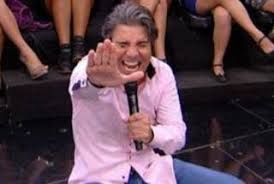

PARA TUDO 

---

Vamos analisar novamente o que tem dentro dos dados de teste.

In [38]:
teste.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


---

Observe que ele não tem a variável **SalePrice**, a pergunta é: como usar a regressão linear múltipla (dado que é uma técnica de aprendizado supervisionado) nos dados de treino se eu não tenho onde comparar e verificar as métricas do modelo ?

Aqui vamos ter que fazer o seguinte: 

1. Pegar os dados de treino
2. Separá-los em treino2 e validação2
3. Rodar a regressão no treino2
4. Comparar os resultados, verificar as métricas no validação2
5. Dado que encontramos um modelo ok, rodamos nosso modelo nos dados de teste que o Kaggle liberou pra gente.

Podemos fazer os dois primeiros passos com o seguinte comando do `sklearn`.

In [39]:
from sklearn.model_selection import train_test_split

x_treino, x_valid, y_treino, y_valid = train_test_split(treino1.drop("SalePrice", axis = 1), treino1["SalePrice"], train_size = 0.7, random_state = 1234)

In [40]:
print("Os dados de treino possui dimensões:", treino1.shape)
print("---")
print("x_treino possui dimensões:", x_treino.shape)
print("---")
print("y_treino possui dimensões:", y_treino.shape)
print("---")
print("x_valid possui dimensões:", x_valid.shape)
print("---")
print("y_valid possui dimensões:", y_valid.shape)

Os dados de treino possui dimensões: (1460, 296)
---
x_treino possui dimensões: (1021, 295)
---
y_treino possui dimensões: (1021,)
---
x_valid possui dimensões: (439, 295)
---
y_valid possui dimensões: (439,)


---

Com os dados separados em treino e validação, podemos continuar para o passo 3 que é rodar a regressão inicialmente importando o módulo da regressão linear a nossa métrica de verificação que é o **RMSE** do `sklearn`e chamar o modelo de regressão linear

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

reg = LinearRegression()

reg.fit(X = x_treino, y = y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

---

Podemos avaliar inicialmente a qualidade do nosso modelo através do:

In [42]:
x_treino1 = sm.add_constant(x_treino)
reg1 = sm.OLS(y_treino, x_treino1).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     59.75
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        12:02:30   Log-Likelihood:                 1012.7
No. Observations:                1021   AIC:                            -1527.
Df Residuals:                     772   BIC:                            -300.3
Df Model:                         248                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.92

---

**Essa tabela é realmente necessária ?**

Sim, pois nela podemos tirar as seguintes conclusões:

1. O $R^2$ apresentou um valor de 0.95, mostrando que o nosso modelo com estas variáveis conseguiu captar bem a variação do processo;
2. Algumas variáveis não apresentaram significância no modelo, ao nível de significância de 5%. Isto é, $p-valor$ < 0.05;
3. A última *Warning*, ao final da tabela diz pra gente: "Temos um eigenvalue muito pequeno, indicando que pode haver multicolineariedade entre as variáveis ou de que a matriz é singular ou não inversível".

Como esse é o nosso primeiro modelo e o objetivo é verificar o **RMSE**, continuaremos com ele. 

In [43]:
# mostrando as previsões para o mesmo conjunto passado

reg.score(x_treino, y_treino)

0.9504799670860988

In [44]:
r2_train = reg.score(x_treino, y_treino)
r2_test = reg.score(x_valid, y_valid)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de validação: %.2f' % r2_test)

R2 no set de treino: 0.95
R2 no set de validação: 0.81


In [45]:
# realiza previsões
previsoes = reg.predict(x_valid)

In [46]:
resultado = abs(y_valid - previsoes)
resultado.mean()

0.10245225351459097

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_valid, previsoes))

rmse

0.1685156313232654